<a href="https://colab.research.google.com/github/YunaZhu/2025_Intro_Python/blob/main/FEEDBACK_ZIYU_ZHU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedback for Introduction to Scientific Programming with Python

In general, I found exercise serie 1.8 very challenging.

(i) For part I, the most difficult part is to understand the sape of different variables in order to plot them correctly.

My codes produced several bugs:
- The plot it's all yellow because I did not add temp_celsius=temp-273.15
- The error says 'x and y must have same first dimension', so I checked temp.shape(94,192), lon.shape(192,), and lat.shape(94,), then changed the axis to 1.

/tmp/ipython-input-1486861593.py:36: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax1.contour(lon,lat,temp>-10,cmap='gist_yerg',levels=np.linspace(-30,40,15),extend='both', linestyle='dotted')


ValueError: x and y must have same first dimension, but have shapes (192,) and (94,)

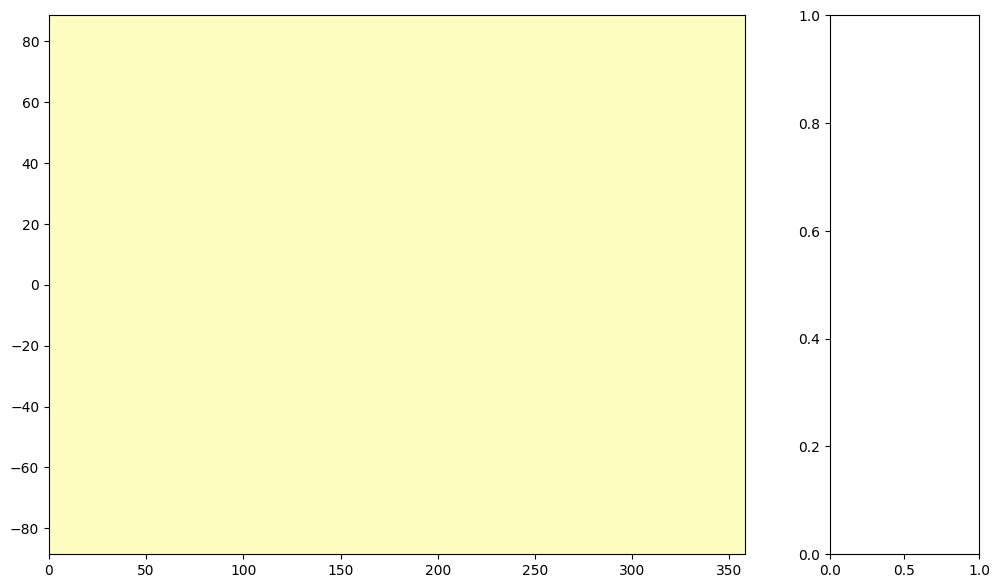

In [ ]:
# Part I:s
import pooch
import numpy as np
import matplotlib.pyplot as plt

# In order to keep our code concise and readable, we'll use a variable that
# stores the common part of the URL where the data is hosted. Then, we'll store
# the full URL for each file in its own variable
base_url = 'https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/'
lon_url =  f'{base_url}EQtSkmHdXlZAuZcDljeHXuMBIVGfXP4lkR56RX6vuCDh1Q?download=1'
lat_url =  f'{base_url}EbMAwn26etZPjxw4F3akRt8BmPef3PMQPn751e6tF0Xi-Q?download=1'
temp_url = f'{base_url}EfUOMGrJNtVMgJUtfP9137sB9d64M_osBRPa0iQRSCHKGg?download=1'

# Let's go ahead and cache each file
lon_filename  = pooch.retrieve(lon_url,
                               known_hash='eaf54b88dd89279d3034da17fe8470dc2c841bf9fa89b2aa741dacff9c326cdb'
                               )

lat_filename  = pooch.retrieve(lat_url,
                               known_hash='af1f438080460e1fca4583b2ec19b44285a3d3776e4d21b8da9b6e162906c88a'
                               )
temp_filename = pooch.retrieve(temp_url,
                               known_hash='e040ca257334708b43e86398e09a5669fcf051179ecf5dcd278f758d67beed20'
                               )

# And then load each file into a numpy array. You can now use these variables
# to continue with the exercise :)
lon = np.load(lon_filename)
lat = np.load(lat_filename)
temp = np.load(temp_filename)

# Replicate this figure
# Temperature values are originally in Kelvin units -> Convert to degree celsius by subtracting 273.15
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,7),gridspec_kw={'width_ratios': [7, 1.5]})
ctemp = ax1.contourf(lon,lat,temp,cmap='magma',levels=np.linspace(-30,40,15),extend='both')
ax1.contour(lon,lat,temp>-10,cmap='gist_yerg',levels=np.linspace(-30,40,15),extend='both', linestyle='dotted')
ax2.plot(np.mean(temp,axis=0),lat,c='k')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Current Global Temperature')
ax1.legend()
cbar=fig.colorbar(ctemp)
cbar.set_label('$^o$C', rotation=270, labelpad=15)

ax2.plot(np.mean(temp_celsius,axis=0),lat,lw=2,c='k')
ax2.set_xlabel(r'$^{o}$C') # $ $ for math equation, ^o is the exponent of C
ax2.set_ylabel(r'Latitude')
ax2.set_title('Zonal Mean Temperature')
plt.grid()
plt.show()

(ii) My solution:

/tmp/ipython-input-2211464773.py:5: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax1.contour(lon,lat,temp_celsius>-10,cmap='gist_yerg',levels=np.linspace(-30,40,15),extend='both', linestyle='dotted')
/tmp/ipython-input-2211464773.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


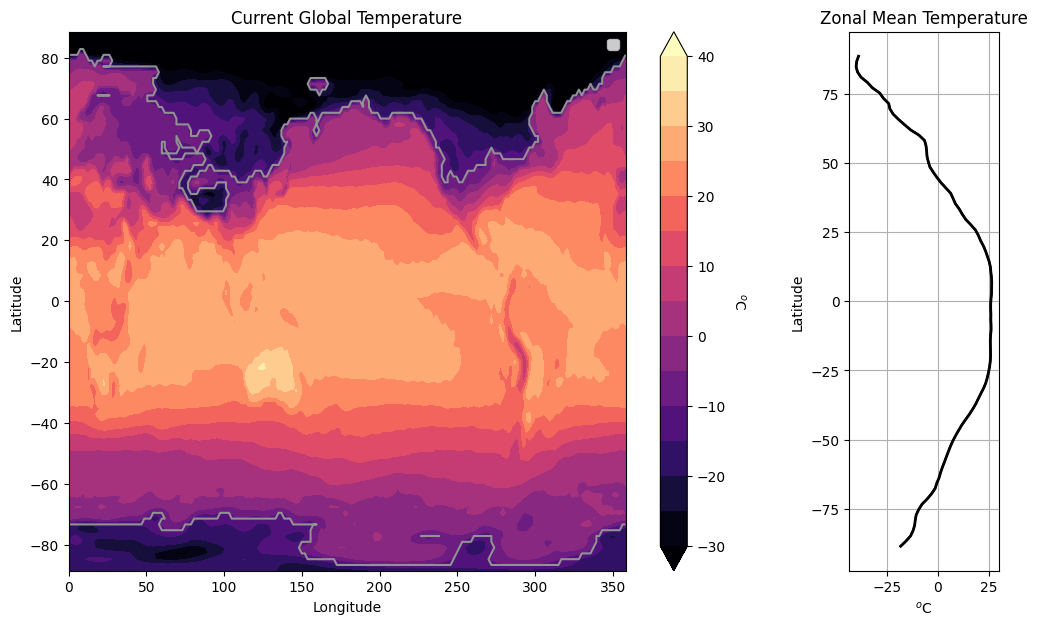

In [ ]:
# Temperature values are originally in Kelvin units -> Convert to degree celsius by subtracting 273.15
temp_celsius=temp-273.15
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,7),gridspec_kw={'width_ratios': [7, 1.5]})
ctemp = ax1.contourf(lon,lat,temp_celsius,cmap='magma',levels=np.linspace(-30,40,15),extend='both')
ax1.contour(lon,lat,temp_celsius>-10,cmap='gist_yerg',levels=np.linspace(-30,40,15),extend='both', linestyle='dotted')
ax2.plot(np.mean(temp_celsius,axis=1),lat,c='k')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Current Global Temperature')
ax1.legend()
cbar=fig.colorbar(ctemp)
cbar.set_label('$^o$C', rotation=270, labelpad=15)

ax2.plot(np.mean(temp_celsius,axis=1),lat,lw=2,c='k')
ax2.set_xlabel(r'$^{o}$C') # $ $ for math equation, ^o is the exponent of C
ax2.set_ylabel(r'Latitude')
ax2.set_title('Zonal Mean Temperature')
plt.grid()
plt.show()

(i) For part II, vmax=2.5 is using the wrong scale for the scatter plot, which makes my plot all in yellow points.

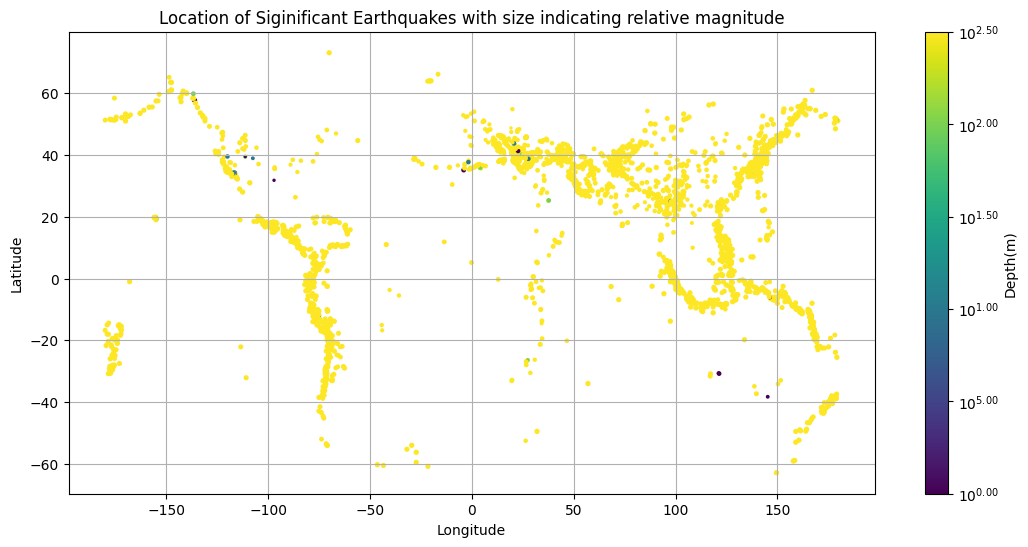

In [ ]:
#part II:
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg?download=1",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

# This is the function to the set the ticks in the colorbar to be in scientific notations.
# You can directly use this function and don't need to change anything in this cell.
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'$10^{{{}}}$'.format(a)

# Replicate the figure here
fig,axe = plt.subplots(ncols=1,nrows=1, figsize=(13,6))
ctemp=axe.scatter(longitude,latitude,s=(magnitude),c=np.array(depth),marker='o',cmap='viridis',vmin=0,vmax=2.5) # c=color, vmin and vmax for value clipping
axe.set_xlabel('Longitude')
axe.set_ylabel('Latitude')
axe.set_title('Location of Siginificant Earthquakes with size indicating relative magnitude')
fig.colorbar(ctemp,ax=axe,label='Depth(m)',format=ticker.FuncFormatter(fmt))
plt.grid()
plt.show()

(ii) Change vmax to 10**2.5, but I still cannot reproduce the same plot as following:


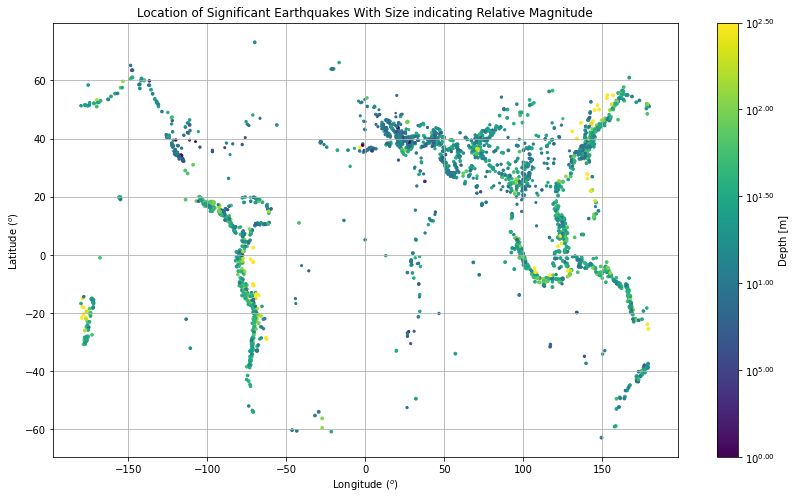

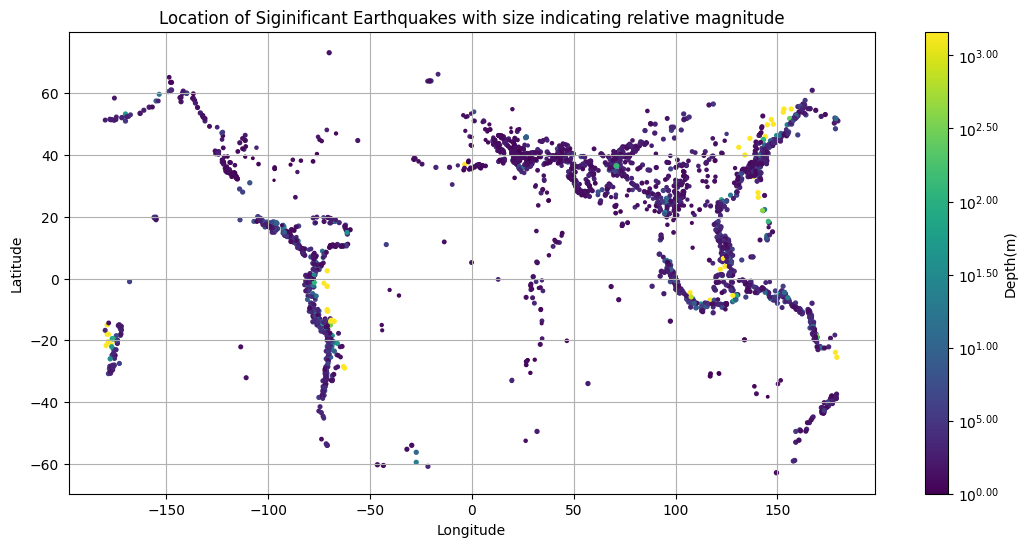

In [ ]:
fig,axe = plt.subplots(ncols=1,nrows=1, figsize=(13,6))
ctemp=axe.scatter(longitude,latitude,s=(magnitude),c=np.array(depth),marker='o',cmap='viridis',vmin=0,vmax=10**2.5) # c=color, vmin and vmax for value clipping
axe.set_xlabel('Longitude')
axe.set_ylabel('Latitude')
axe.set_title('Location of Siginificant Earthquakes with size indicating relative magnitude')
fig.colorbar(ctemp,ax=axe,label='Depth(m)',format=ticker.FuncFormatter(fmt))
plt.grid()
plt.show()

For Part III:
- (i) I worte 'variable' instead of 'variables', 'PlateCaree' instead of 'PlateCarree'. We can check dir(seaice1)



In [ ]:
# Part III:
!pip install --no-binary 'shapely==1.6.4' 'shapely==1.6.4' --force
!pip install cartopy
!pip install netCDF4
import pooch
import cartopy
import cartopy.crs as ccrs
#import xarray as xr
from netCDF4 import Dataset
######################################################################################################################################################
# Download Sea Ice files
url1 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EREWA38Rs-FFslQd4yKZBAsBF8m9yLzeJKEAN5gSz7LLFw?download=1"
fname1 = pooch.retrieve(url1, known_hash='1ff50bca1e6249a9b2fcd9d9466e31bdb5be650243f99c7319ab2ce625b87ce7')
url2 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/Ea_2umrDTkhCrN--th4nuokBMcnVlxGshiyUq2eSpvhlTQ?download=1"
fname2 = pooch.retrieve(url2, known_hash='309418969ad09f42b8104589bcb86de4ed353a5742fef9385baec174c7d55e66')
######################################################################################################################################################
# Run these as is. We are reading the sea ice concentration values from our files
seaice1,seaice2 = Dataset(fname1,'r'),Dataset(fname2,'r')
var_toplot1,var_toplot2 = seaice1.variables['seaice_conc_cdr'][:],seaice2.variables['seaice_conc_cdr'][:]



AttributeError: NetCDF: Attribute not found

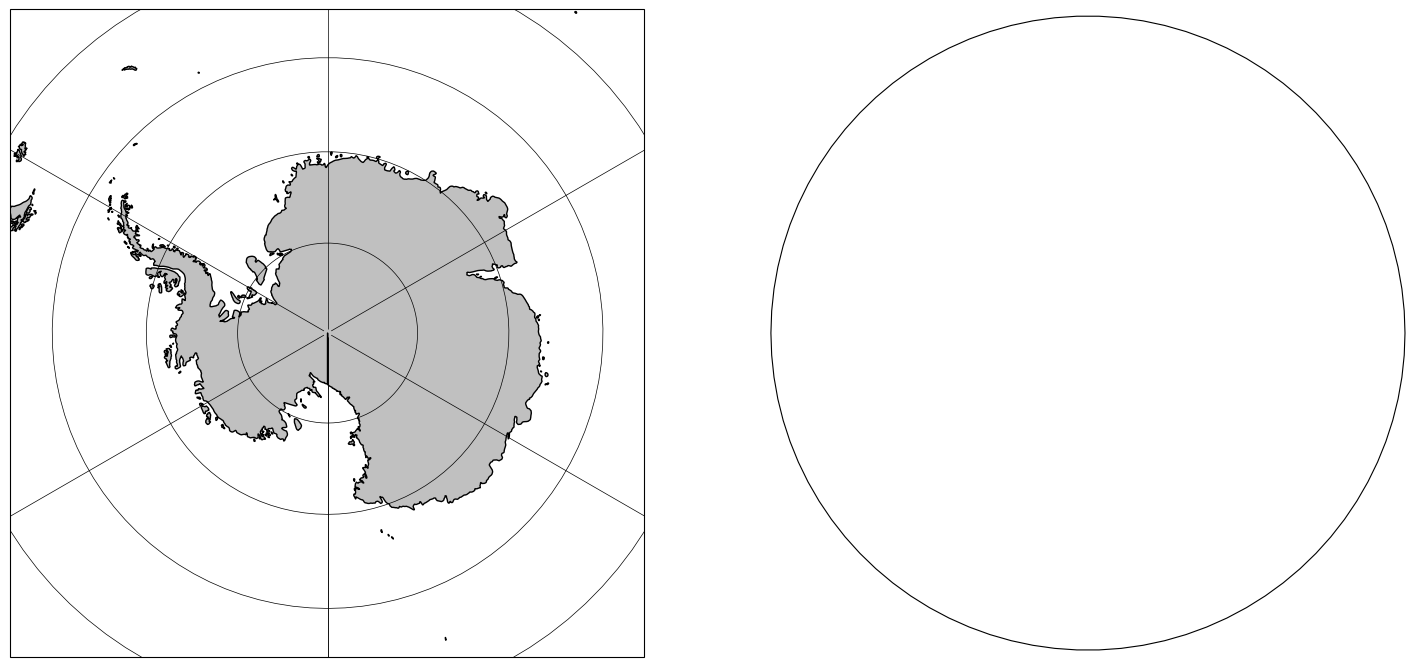

In [ ]:
import matplotlib.pyplot as plt
#import cartopy.feature as cfeature
import numpy as np
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 12),subplot_kw={'projection': ccrs.SouthPolarStereo()})
# The rest doesn't change:
ax[0].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

######################################################################################################################################################
# Add Land and gridlines
# Hint: Check edgecolor to show coast, and facecolor to color the continent
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
ax[0].add_feature(cartopy.feature.LAND, edgecolor='k',facecolor='silver')
ax[0].gridlines(lw=0.5,color='k')
######################################################################################################################################################
# Add Contours
# Hint: X (Y) data in the pcolormesh should be the longitude and latitude of the sea ice data.
# Hint: Check the shape of the var_toplot1, var_toplot2 before plotting
# Hint: longitude and latitude can be accessed with seaice1.variables['longitude'][:], seaice1.variables['latitude'][:]
# Hint: Check this website: https://matplotlib.org/stable/tutorials/colors/colormaps.html for available colormaps
######################################################################################################################################################
sea_ice1 = ax[0].pcolormesh(seaice1.variable['longitude'][:],
                            seaice1.variables['latitude'][:],
                            np.ma.masked_greater(var_toplot1[0],1),
                            transform=ccrs.PlateCaree(),vmin=0,vmax=1,cmap='Spectral')
plt.colorbar(sea_ice1,ax=ax[0],fraction=0.046, pad=0.04,label='Sea Ice concentration')
#ax[0].set_title('2017-08-01')


#ax[1].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
#ax[1].add_feature(cartopy.feature.Land, edgecolor='k',facecolor='silver')
#ax[1].gridlines(lw=0.5,color='k')

#sea_ice2 = ax[1].pcolormesh(seaice2.variable['longitude'][:], seaice2.variables['latitude'][:], np.ma.masked_greater(var_toplot2[1],1), transform=SouthPolarStereo,vmin=0,vmax=1,cmap='Spectral')
#plt.colorbar(sea_ice2,ax=ax[1],label='Sea Ice concentration',fraction=0.046, pad=0.04)
#ax[1].set_title('2017-12-31')
plt.show()

In [ ]:
(ii) Solution:

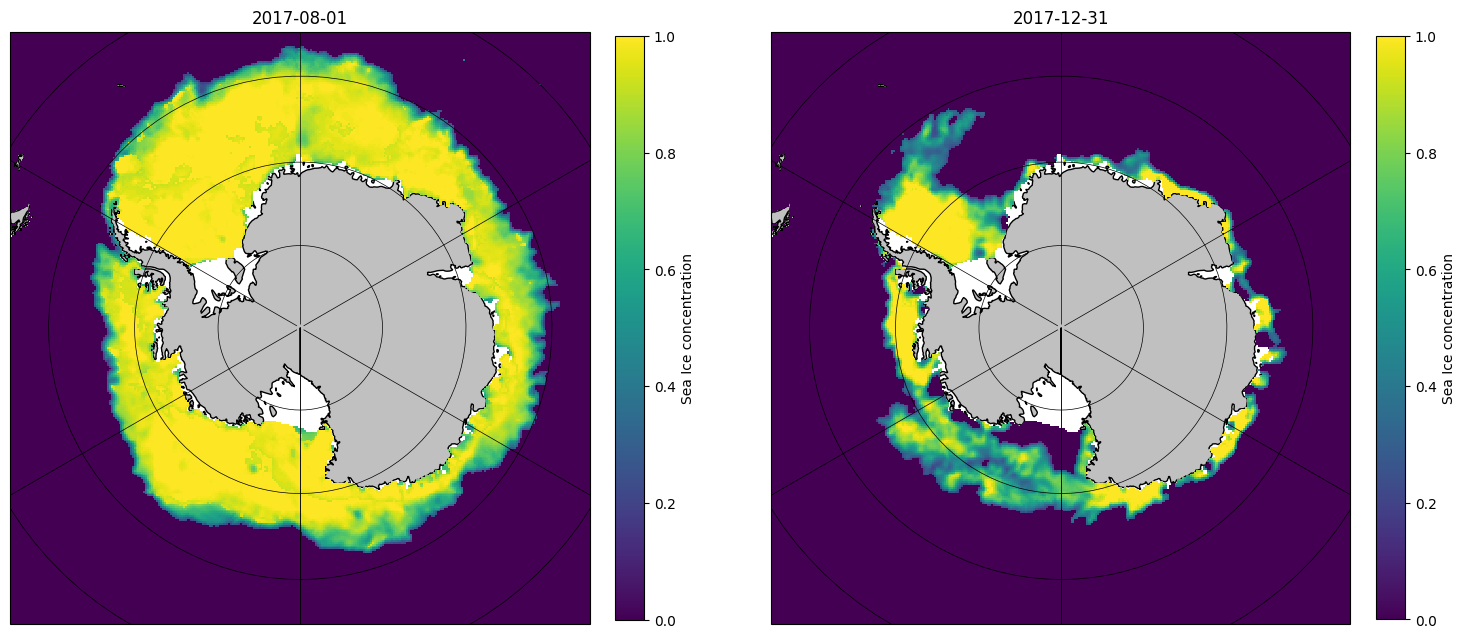

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 12),subplot_kw={'projection': ccrs.SouthPolarStereo()})
# The rest doesn't change:
ax[0].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

######################################################################################################################################################
# Add Land and gridlines
# Hint: Check edgecolor to show coast, and facecolor to color the continent
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
ax[0].add_feature(cartopy.feature.LAND, edgecolor='k',facecolor='silver')
ax[0].gridlines(lw=0.5,color='k')
######################################################################################################################################################
# Add Contours
# Hint: X (Y) data in the pcolormesh should be the longitude and latitude of the sea ice data.
# Hint: Check the shape of the var_toplot1, var_toplot2 before plotting
# Hint: longitude and latitude can be accessed with seaice1.variables['longitude'][:], seaice1.variables['latitude'][:]
# Hint: Check this website: https://matplotlib.org/stable/tutorials/colors/colormaps.html for available colormaps
######################################################################################################################################################
sea_ice1 = ax[0].pcolormesh(seaice1.variables['longitude'][:],
                            seaice1.variables['latitude'][:],
                            np.ma.masked_greater(var_toplot1[0,:,:],1),
                            transform=ccrs.PlateCarree(),
                            vmin=0,vmax=1,cmap='viridis')
plt.colorbar(sea_ice1,ax=ax[0],fraction=0.046, pad=0.04,label='Sea Ice concentration')
ax[0].set_title('2017-08-01')


ax[1].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
ax[1].add_feature(cartopy.feature.LAND, edgecolor='k',facecolor='silver')
ax[1].gridlines(lw=0.5,color='k')

sea_ice2 = ax[1].pcolormesh(seaice2.variables['longitude'][:],
                            seaice2.variables['latitude'][:],
                            np.ma.masked_greater(var_toplot2[0,:,:],1),
                            transform=ccrs.PlateCarree(),
                            vmin=0,vmax=1,cmap='viridis')
plt.colorbar(sea_ice2,ax=ax[1],label='Sea Ice concentration',fraction=0.046, pad=0.04)
ax[1].set_title('2017-12-31')
plt.show()